In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,12)
pd.options.display.max_columns = None
pd.options.display.precision = 4

## Brainwave Frequencies:
Gamma, 30 to 50 Hz.  
Beta, 14 to 30 Hz.  
Alpha, 8 to 14 Hz.  
Theta, 4 to 8 Hz.  
Delta, 0.1 to 4 Hz.  

## Changing Bin Size: 
https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python  
(Search for 'bin')

An EEG processing library:  
https://github.com/pbashivan/EEGLearn

In [4]:
%run utils.py

In [5]:
%run models.py

Using TensorFlow backend.


In [10]:
image_size = 28
frame_duration = 1.0
overlap = 0.5
X, y = make_data_pipeline(file_names,labels,image_size,frame_duration,overlap)

Generating training data...
Processing session:  data/ML101_KS.csv . ( 1  of  16 )
234  frames generated with label  1 .234Interpolating 126/234


Processing session:  data/ML101_US.csv . ( 2  of  16 )
224  frames generated with label  0 .224Interpolating 139/224Interpolating 209/224


Processing session:  data/ML102_KS.csv . ( 3  of  16 )
222  frames generated with label  1 .222Interpolating 104/222Interpolating 155/222Interpolating 221/222


Processing session:  data/ML102_US.csv . ( 4  of  16 )
218  frames generated with label  0 .218Interpolating 135/218Interpolating 195/218


Processing session:  data/ML103_KS.csv . ( 5  of  16 )
226  frames generated with label  1 .226Interpolating 123/226Interpolating 170/226


Processing session:  data/ML103_US.csv . ( 6  of  16 )
208  frames generated with label  0 .208Interpolating 146/208


Processing session:  data/ML104_KS.csv . ( 7  of  16 )
202  frames generated with label  1 .202Interpolating 124/202Interpolating 198/202


Processing se

In [11]:
X.shape

(3642, 28, 28, 3)

In [12]:
y.shape

(3642,)

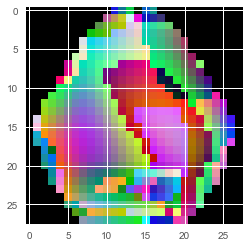

In [13]:
plt.imshow(X[0])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=True)

In [15]:
y_train.shape

(2913,)

In [16]:
# input image dimensions
img_rows, img_cols = 28, 28

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = (img_rows, img_cols, 3)

x_train shape: (2913, 28, 28, 3)
2913 train samples
729 test samples


In [ ]:
np.mean(x_train)

1.7346646

In [ ]:
batch_size = 32
num_classes = 2
epochs = 200

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = get_model_1(input_shape, num_classes)
# model = get_model_2(input_shape, num_classes)


# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Using TensorFlow backend.


Train on 2913 samples, validate on 729 samples
Epoch 1/200
2913/2913 [==============================] - 8s - loss: 0.6951 - acc: 0.5129 - val_loss: 0.6891 - val_acc: 0.5034